Alan Urierl Merlan Esquivel A01656162

Elías Rodríguez Hernández A01654900

Alejandro Sánchez Flores A01662783



# Hill Climb

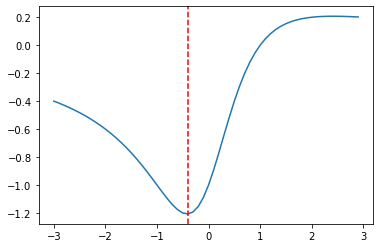

In [ ]:
# funcion de optimizacion convexa
from numpy import arange
from matplotlib import pyplot

# funcion objetivo
def objective(x):
	return (x[0]-1)/(x[0]**2+1)

# definir rango de entrada
r_min, r_max = -3.0, 3.0
# muestrear  los inputs de manera aleatoria cada 0.1 pasos
inputs = arange(r_min, r_max, 0.1)
# calcular objetivos
results = [objective([x]) for x in inputs]
# crear grafica
pyplot.plot(inputs, results)
# definir valor optimo de x
x_optima = -0.4
# dibujar linea en el optimo de x
pyplot.axvline(x=x_optima, ls='--', color='red')
pyplot.show()

>1 f([-1.63088192]) = -0.71886
>3 f([-1.54670415]) = -0.75073
>4 f([-1.4099456]) = -0.80656
>5 f([-1.35247483]) = -0.83150
>7 f([-1.33538229]) = -0.83909
>9 f([-1.17161944]) = -0.91526
>12 f([-1.08043208]) = -0.95990
>14 f([-0.89798806]) = -1.05071
>15 f([-0.75222555]) = -1.11903
>22 f([-0.6871027]) = -1.14604
>24 f([-0.46322841]) = -1.20472
>25 f([-0.43844987]) = -1.20651
>26 f([-0.40581026]) = -1.20703
>29 f([-0.40820232]) = -1.20707
>35 f([-0.40976238]) = -1.20709
>58 f([-0.41532109]) = -1.20711
Hecho!
f([-0.41532109]) = -1.207106


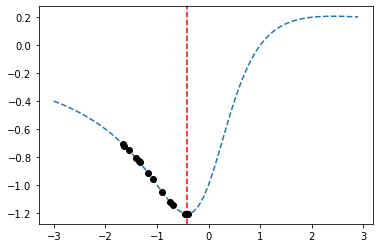

In [ ]:
from numpy import asarray
from numpy import arange
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# funcion objetivo
def objective(x):
	return (x[0]-1)/(x[0]**2+1)

# algoritmo hill climb
def hillclimbing(objective, bounds, n_iterations, step_size):
	# generar punto inicial
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluar punto inicial
	solution_eval = objective(solution)
	# correr algoritmo
	solutions = list()
	solutions.append(solution)
	for i in range(n_iterations):
		# ejecutar un paso
		candidate = solution + randn(len(bounds)) * step_size
		# evaluar el punto en el que estamos
		candidte_eval = objective(candidate)
		# revisar si deberiamos conservar el punto
		if candidte_eval <= solution_eval:
			# guardar el punto 
			solution, solution_eval = candidate, candidte_eval
			# memoria
			solutions.append(solution)
			# progreso
			print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval, solutions]

# generador de numero aleatorio
seed(5)
# definir rango
bounds = asarray([[-3.0, 3.0]])
# definir total de iteraciones
n_iterations = 100
# tamaño de paso maximo
step_size = 0.1
# algoritmo
best, score, solutions = hillclimbing(objective, bounds, n_iterations, step_size)
print('Hecho!')
print('f(%s) = %f' % (best, score))
# muestrear los candidatos cada tamaño de paso
inputs = arange(bounds[0,0], bounds[0,1], 0.1)
# crear grafica de input vs resultado
pyplot.plot(inputs, [objective([x]) for x in inputs], '--')
# dibujar linea en el punto optimo (opcional)
pyplot.axvline(x=[best], ls='--', color='red')
# plottear muestras
pyplot.plot(solutions, [objective(x) for x in solutions], 'o', color='black')
pyplot.show()

# Recocido Simulado

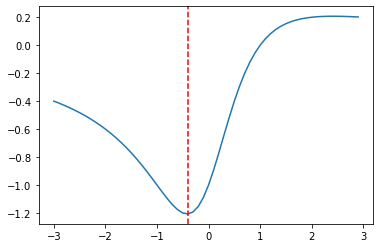

In [ ]:

from numpy import arange
from matplotlib import pyplot

# funcion objetivo
def objective(x):
	return (x[0]-1)/(x[0]**2+1)

# definir rango
r_min, r_max = -3.0, 3.0
# muestrea los inputs cada 0.1 pasos
inputs = arange(r_min, r_max, 0.1)
# calcular objetivos
results = [objective([x]) for x in inputs]
# Crear plot
pyplot.plot(inputs, results)
# definir valor optimo
x_optima = -0.4
# 
pyplot.axvline(x=x_optima, ls='--', color='red')
# 
pyplot.show()

Aquí usamos el error "Criterio de Metropolis"


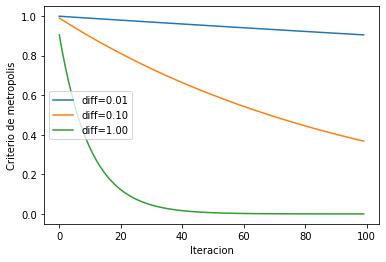

In [ ]:
# explorear criterio de aceptacion de metropolis para el simualted annealing
from math import exp
from matplotlib import pyplot
# iteraciones totales
iterations = 100
# temperatura inicial
initial_temp = 10
# arreglo del interaciones de 0 a iterations -1
iterations = [i for i in range(iterations)]
# temperaturas de cada iteracion
temperatures = [initial_temp/float(i + 1) for i in iterations]
# criterio de aceptacion de metropolis
differences = [0.01, 0.1, 1.0]
for d in differences:
	metropolis = [exp(-d/t) for t in temperatures]
	# graficar
	label = 'diff=%.2f' % d
	pyplot.plot(iterations, metropolis, label=label)
# 
pyplot.xlabel('Iteracion')
pyplot.ylabel('Criterio de metropolis')
pyplot.legend()
pyplot.show()

El crietoerio e smejor si cada paso hay una diferencia de un punto

>43 f([-0.48355127]) = -1.20240
>51 f([-0.43080593]) = -1.20683
>52 f([-0.39830019]) = -1.20684
>53 f([-0.41949148]) = -1.20708
>57 f([-0.41746676]) = -1.20710
>321 f([-0.4112952]) = -1.20710
>354 f([-0.41357063]) = -1.20711
>356 f([-0.41382355]) = -1.20711
>708 f([-0.41400334]) = -1.20711
>896 f([-0.41410519]) = -1.20711
Hecho!
f([-0.41410519]) = -1.207107


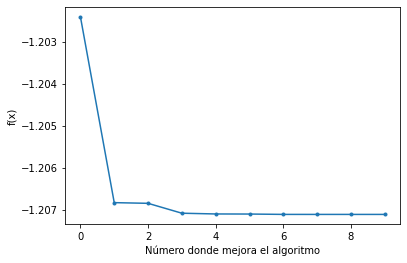

In [ ]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# funcion objetivo
def objective(x):
	return (x[0]-1)/(x[0]**2+1)


# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generar punto inicial
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluar punto inicial
	best_eval = objective(best)
	# solucion actual
	curr, curr_eval = best, best_eval
	scores = list()
	# correr algoritmo
	for i in range(n_iterations):
		# tamaño de paso
		candidate = curr + randn(len(bounds)) * step_size
		# evaluar punto candidato
		candidate_eval = objective(candidate)
		# revisar si es mejor solucion
		if candidate_eval < best_eval:
			# guardar el mejor punto
			best, best_eval = candidate, candidate_eval
			# mantener los mejores puntos
			scores.append(best_eval)
			# Progreso
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# diferencie entre el candidato y el punto actual
		diff = candidate_eval - curr_eval
		# calcular temperatura para la epoca actual
		t = temp / float(i + 1)
		# calcular metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# revisar si se debe mantener el punto nuevo
		if diff < 0 or rand() < metropolis:
			# guardar el punto actual
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval, scores]

# RNG
seed(1)
# definir rango de entrada
bounds = asarray([[-3.0, 3.0]])
# definir total de iteraciones
n_iterations = 1000
# definir el tamaño de paso
step_size = 0.1
# temperatura inicial
temp = 10
# simulated annealing
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Hecho!')
print('f(%s) = %f' % (best, score))
# 
pyplot.plot(scores, '.-')
pyplot.xlabel('Número donde mejora el algoritmo')
pyplot.ylabel('f(x)')
pyplot.show()